### Kelly Tornetta
### Linear Regression: Normal Equation, Batch Gradient Descent, Stochastic Gradient Descent

#### Importing Data

In [20]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import os

In [7]:
data = [[6.1101,17.592],
[5.5277,9.1302],
[8.5186,13.662],
[7.0032,11.854],
[5.8598,6.8233],
[8.3829,11.886],
[7.4764,4.3483],
[8.5781,12],
[6.4862,6.5987],
[5.0546,3.8166],
[5.7107,3.2522],
[14.164,15.505],
[5.734,3.1551],
[8.4084,7.2258],
[5.6407,0.71618],
[5.3794,3.5129],
[6.3654,5.3048],
[5.1301,0.56077],
[6.4296,3.6518],
[7.0708,5.3893],
[6.1891,3.1386],
[20.27,21.767],
[5.4901,4.263],
[6.3261,5.1875],
[5.5649,3.0825],
[18.945,22.638],
[12.828,13.501],
[10.957,7.0467],
[13.176,14.692],
[22.203,24.147],
[5.2524,-1.22],
[6.5894,5.9966],
[9.2482,12.134],
[5.8918,1.8495],
[8.2111,6.5426],
[7.9334,4.5623],
[8.0959,4.1164],
[5.6063,3.3928],
[12.836,10.117],
[6.3534,5.4974],
[5.4069,0.55657],
[6.8825,3.9115],
[11.708,5.3854],
[5.7737,2.4406],
[7.8247,6.7318],
[7.0931,1.0463],
[5.0702,5.1337],
[5.8014,1.844],
[11.7,8.0043],
[5.5416,1.0179],
[7.5402,6.7504],
[5.3077,1.8396],
[7.4239,4.2885],
[7.6031,4.9981],
[6.3328,1.4233],
[6.3589,-1.4211],
[6.2742,2.4756],
[5.6397,4.6042],
[9.3102,3.9624],
[9.4536,5.4141],
[8.8254,5.1694],
[5.1793,-0.74279],
[21.279,17.929],
[14.908,12.054],
[18.959,17.054],
[7.2182,4.8852],
[8.2951,5.7442],
[10.236,7.7754],
[5.4994,1.0173],
[20.341,20.992],
[10.136,6.6799],
[7.3345,4.0259],
[6.0062,1.2784],
[7.2259,3.3411],
[5.0269,-2.6807],
[6.5479,0.29678],
[7.5386,3.8845],
[5.0365,5.7014],
[10.274,6.7526],
[5.1077,2.0576],
[5.7292,0.47953],
[5.1884,0.20421],
[6.3557,0.67861],
[9.7687,7.5435],
[6.5159,5.3436],
[8.5172,4.2415],
[9.1802,6.7981],
[6.002,0.92695],
[5.5204,0.152],
[5.0594,2.8214],
[5.7077,1.8451],
[7.6366,4.2959],
[5.8707,7.2029],
[5.3054,1.9869],
[8.2934,0.14454],
[13.394,9.0551],
[5.4369,0.61705]]


In [16]:
x = [];
for row in data:
    x.append(row[0])

In [19]:
y = [];
for row in data:
    y.append(row[1])

Text(0.5, 1.0, 'Plotting Given Data2.txt')

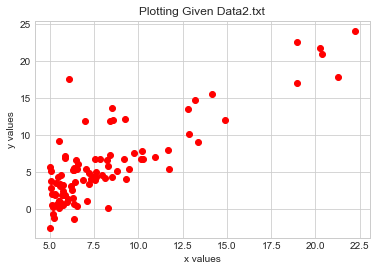

In [22]:
plt.plot(x,y,'ro')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Plotting Given Data2.txt")

#### Splitting into Train and Test Data

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

### 1: Normal Equation 

#### Function to return values of $w_0$ and $w_1$ using the normal equation:

In [110]:
def normal_equation(x, y):
    
#we need to create a m x 2 matrix of x_0 = 1 (column 1) and x_1 = given x values (column 2)

    m = len(y)                         #the length of array y (target values) is the dimension m
    x_0 = np.ones((m,1))               #creates array of 1's of dimension m x 1
    x = np.reshape(x, (m,1))           #fixes error all arrays must have same dimension
    X = np.append(x_0, x, axis = 1)    #now we have an m x 2 matrix for X consisting of x_0 and x_1

#now we can calculate w 

    X_transpose = np.transpose(X)      #finds X transpose
    
    w = ((np.linalg.inv(X_transpose.dot(X))).dot(X_transpose)).dot(y)   #formula for w
    
    return w                           #returns array of w values

In [111]:
normal_equation(x_train, y_train)

array([-3.63963925,  1.19367575])

Using the normal equation, we get $w_0 = -3.64$ and $w_1 = 1.19$.

### MSE Cost Function

#### Function to compute MSE cost for given $m$, $w_0$, $w_1$, $x$, and $y$:

In [309]:
def mse_cost(m, w0, w1, x, y):
    cost = 1.0/m * sum(((w0 + w1*np.asarray([x[i]]) - y[i])**2)  #formula for cost
                    for i in range (m))
    
    cost = cost.tolist()                                         
    
    return cost

### 2: Batch Gradient Descent

#### Function to return $w_0$ and $w_1$ using the batch gradient descent method of linear regression:
I am choosing to end the code after 10,000 iterations.

In [242]:
def batch_gradient_descent(alpha, x_train, x_test, y_train,  y_test, max_iter):
    end = False
    
    m = len(y_train)                             
    
    w0 = np.random.rand()                        #picking random starting point for w_0 and w_1
    w1 = np.random.rand()
    
    num_iter = 0
    
    while not end:                               
        
        w0 = w0 - alpha*(2.0/m * sum((w0 + w1*np.asarray([x_train[i]]) - y_train[i]) #formulas for new w_0 and w_1
                              for i in range (m)))
        w1 = w1 - alpha*(2.0/m * sum((w0 + w1*np.asarray([x_train[i]]) - y_train[i])*np.asarray([x_train[i]]) 
                              for i in range (m)))
        
        num_iter = num_iter + 1                  
        
        if num_iter == max_iter: end = True      
    
    return w0, w1                                #return coefficients
    

In [300]:
batch_gradient_descent(.001, x_train, x_test, y_train, y_test,10000)

(array([-3.54581758]), array([1.18469721]))

Using the batch gradient descent method of linear regression, we get $w_0 = -3.55$ and $w_1 = 1.18$.

#### Function to return values of MSE cost from batch gradient descent for either training data or testing data:

In [244]:
def batch_gradient_descent_cost(alpha, x_train, x_test, y_train,  y_test, max_iter, cost_type):
    end = False
    
    m = len(y_train)                            
    n = len(y_test)                             
    
    w0 = np.random.rand()                       #picking random starting point for coefficients
    w1 = np.random.rand()
    
    num_iter = 0
    
    cost_train_array = []                       
    cost_test_array = []
    
    while not end:                          
        
        w0 = w0 - alpha*(2.0/m * sum((w0 + w1*np.asarray([x_train[i]]) - y_train[i]) #formulas for new w_0 and w_1
                              for i in range (m)))
        w1 = w1 - alpha*(2.0/m * sum((w0 + w1*np.asarray([x_train[i]]) - y_train[i])*np.asarray([x_train[i]]) 
                              for i in range (m)))
        
        cost_train = mse_cost(m, w0, w1, x_train, y_train)   #cost for training data and testing data
        cost_test = mse_cost(n, w0, w1, x_test, y_test)
        
        cost_train_array.append(cost_train)     #adding cost to respective arrays
        cost_test_array.append(cost_test)
        
        num_iter = num_iter + 1                 
        
        if num_iter == max_iter: end = True     
    
    if cost_type == 0: return cost_train_array       #return cost array of specified data type
    elif cost_type == 1: return cost_test_array
    else: return 0
    

#### Plotting cost function vs. iterations for different values of alpha:

In [207]:
alpha1 = batch_gradient_descent_cost(.01, x_train, x_test, y_train,  y_test, 2000, 0)
alpha2 = batch_gradient_descent_cost(.001, x_train, x_test, y_train,  y_test, 2000, 0)
alpha3 = batch_gradient_descent_cost(.0001, x_train, x_test, y_train,  y_test, 2000, 0)
alpha4 = batch_gradient_descent_cost(.00001, x_train, x_test, y_train,  y_test, 2000, 0)
alpha5 = batch_gradient_descent_cost(.000001, x_train, x_test, y_train,  y_test, 2000, 0)

In [208]:
x_iter = list(range(0, 2000))

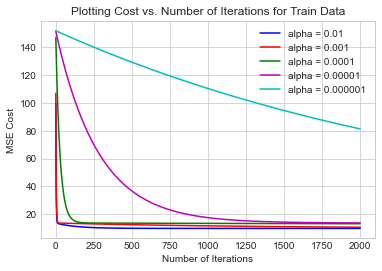

In [211]:
plt.plot(x_iter, alpha1, 'b-', label = "alpha = 0.01")
plt.plot(x_iter, alpha2, 'r-', label = "alpha = 0.001")
plt.plot(x_iter, alpha3, 'g-', label = "alpha = 0.0001")
plt.plot(x_iter, alpha4, 'm-', label = "alpha = 0.00001")
plt.plot(x_iter, alpha5, 'c-', label = "alpha = 0.000001")
plt.xlabel("Number of Iterations")
plt.ylabel("MSE Cost")
plt.title("Batch: Plotting Cost vs. Number of Iterations for Train Data")
plt.legend()

In [210]:
alpha6 = batch_gradient_descent_cost(.01, x_train, x_test, y_train,  y_test, 2000, 1)
alpha7 = batch_gradient_descent_cost(.001, x_train, x_test, y_train,  y_test, 2000, 1)
alpha8 = batch_gradient_descent_cost(.0001, x_train, x_test, y_train,  y_test, 2000, 1)
alpha9 = batch_gradient_descent_cost(.00001, x_train, x_test, y_train,  y_test, 2000, 1)
alpha0 = batch_gradient_descent_cost(.000001, x_train, x_test, y_train,  y_test, 2000, 1)

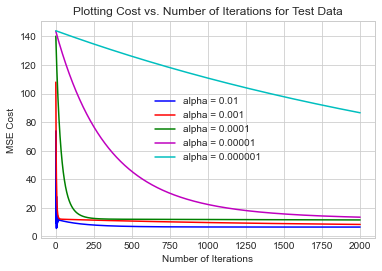

In [212]:
plt.plot(x_iter, alpha6, 'b-', label = "alpha = 0.01")
plt.plot(x_iter, alpha7, 'r-', label = "alpha = 0.001")
plt.plot(x_iter, alpha8, 'g-', label = "alpha = 0.0001")
plt.plot(x_iter, alpha9, 'm-', label = "alpha = 0.00001")
plt.plot(x_iter, alpha0, 'c-', label = "alpha = 0.000001")
plt.xlabel("Number of Iterations")
plt.ylabel("MSE Cost")
plt.title("Batch: Plotting Cost vs. Number of Iterations for Test Data")
plt.legend()

Looking at both testing data and training data, we see that as alpha decreases, so does the MSE. The best learning rate is $\alpha = 0.01$.

### 3:  Stochastic Gradient Descent

#### Function to return $w_0$ and $w_1$ using the stochastic gradient descent method of linear regression:
Again, I am choosing to end the function after 10,000 iterations.

In [316]:
def stochastic_gradient_descent(alpha, x_train, x_test, y_train,  y_test, max_iter):
    end = False
    
    m = len(y_train)                     
    
    w0 = np.random.rand()                
    w1 = np.random.rand()
    
    num_iter = 0
    
    while not end:                       
        
        m_list = np.arange(0, m, 1)      #creating list of index values to randomly choose from
    
        for i in range (m):
            random = np.random.choice(m_list)  #randomly selecting index for calculation
            
                                               #formulas for coefficients
            w0 = w0 - alpha*(2.0/m * (w0 + w1*np.asarray([x_train[random]]) - y_train[random]))
            w1 = w1 - alpha*(2.0/m * (w0 + w1*np.asarray([x_train[random]]) 
                               - y_train[random])*np.asarray([x_train[random]]))
            
            m_list = m_list[m_list != random]  #removing index from list to not pick again
        
        num_iter = num_iter + 1          
        
        if num_iter == max_iter: end = True    
    
    return w0, w1                        #returning coeffients
    

In [317]:
stochastic_gradient_descent(.001, x_train, x_test, y_train, y_test, 10000)

(array([-3.55089797]), array([1.18472013]))

Using the stochastic gradient descent method of linear regression, we get $w_0 = -3.55$ and $w_1 = 1.18$.

#### Function to return values of MSE cost from stochastic gradient descent for either training data or testing data:

In [318]:
def stochastic_gradient_descent_cost(alpha, x_train, x_test, y_train,  y_test, max_iter, cost_type):
    end = False
    
    m = len(y_train)                                   
    n = len(y_test)                                    
    
    w0 = np.random.rand()                              #randomly selecting starting point for coefficients
    w1 = np.random.rand()
    
    num_iter = 0
    
    cost_train_array = []                              
    cost_test_array = []
    
    while not end:
        
        m_list = np.arange(0, m, 1)                    #creating list of indeces to randomly choose from
        for i in range (m):
            random = np.random.choice(m_list)          #randomly choosing index
            
                                                       #formulas for coefficients
            w0 = w0 - alpha*(2.0/m * (w0 + w1*np.asarray([x_train[random]]) - y_train[random]))
            w1 = w1 - alpha*(2.0/m * (w0 + w1*np.asarray([x_train[random]]) 
                               - y_train[random])*np.asarray([x_train[random]]))
            
            m_list = m_list[m_list != random]         #removing chosen index from list
        
        
        cost_train = mse_cost(m, w0, w1, x_train, y_train)      #calculating mse cost for training data
        cost_test = mse_cost(n, w0, w1, x_test, y_test)         #calculating mse cost for testing data
        
        cost_train_array.append(cost_train)           #adding cost to respective arrays
        cost_test_array.append(cost_test)
    
        num_iter = num_iter + 1                       
        
        if num_iter == max_iter: end = True           
    
    if cost_type == 0: return cost_train_array        #returning chosen array of mse cost
    elif cost_type == 1: return cost_test_array
    else: return 0
 

In [312]:
alpha10 = stochastic_gradient_descent_cost(.01, x_train, x_test, y_train,  y_test, 2000, 0)
alpha20 = stochastic_gradient_descent_cost(.001, x_train, x_test, y_train,  y_test, 2000, 0)
alpha30 = stochastic_gradient_descent_cost(.0001, x_train, x_test, y_train,  y_test, 2000, 0)
alpha40 = stochastic_gradient_descent_cost(.00001, x_train, x_test, y_train,  y_test, 2000, 0)
alpha50 = stochastic_gradient_descent_cost(.000001, x_train, x_test, y_train,  y_test, 2000, 0)

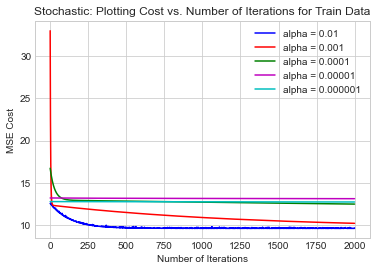

In [313]:
plt.plot(x_iter, alpha10, 'b-', label = "alpha = 0.01")
plt.plot(x_iter, alpha20, 'r-', label = "alpha = 0.001")
plt.plot(x_iter, alpha30, 'g-', label = "alpha = 0.0001")
plt.plot(x_iter, alpha40, 'm-', label = "alpha = 0.00001")
plt.plot(x_iter, alpha50, 'c-', label = "alpha = 0.000001")
plt.xlabel("Number of Iterations")
plt.ylabel("MSE Cost")
plt.title("Stochastic: Plotting Cost vs. Number of Iterations for Train Data")
plt.legend()

In [314]:
alpha60 = stochastic_gradient_descent_cost(.01, x_train, x_test, y_train,  y_test, 2000, 1)
alpha70 = stochastic_gradient_descent_cost(.001, x_train, x_test, y_train,  y_test, 2000, 1)
alpha80 = stochastic_gradient_descent_cost(.0001, x_train, x_test, y_train,  y_test, 2000, 1)
alpha90 = stochastic_gradient_descent_cost(.00001, x_train, x_test, y_train,  y_test, 2000, 1)
alpha00 = stochastic_gradient_descent_cost(.000001, x_train, x_test, y_train,  y_test, 2000, 1)

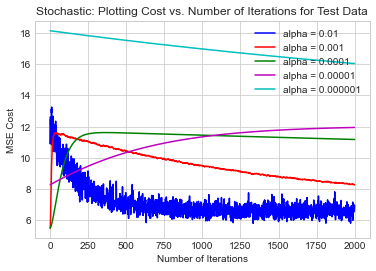

In [315]:
plt.plot(x_iter, alpha60, 'b-', label = "alpha = 0.01")
plt.plot(x_iter, alpha70, 'r-', label = "alpha = 0.001")
plt.plot(x_iter, alpha80, 'g-', label = "alpha = 0.0001")
plt.plot(x_iter, alpha90, 'm-', label = "alpha = 0.00001")
plt.plot(x_iter, alpha00, 'c-', label = "alpha = 0.000001")
plt.xlabel("Number of Iterations")
plt.ylabel("MSE Cost")
plt.title("Stochastic: Plotting Cost vs. Number of Iterations for Test Data")
plt.legend()

Looking at both testing data, we see that as alpha decreases, so does the MSE. The best learning rate is $\alpha = 0.01$.